# **House Price Prediction**

**📜 Table Of Contents:**
* [IMPORTING REQUIRED LIBRARIES](#section-one)
* [GATHERING AND OBSERVING DATA](#section-two)
* [EXPLORATORY DATA ANALYSIS](#section-three)
* [MODEL SELECTION](#section-four)
* [MODEL EVALUATION](#section-five)

---

The variables in the data set:
1. **Suburb**
2. **Address**
3. **Rooms**: Number of rooms
4. **Price**: Price in Australian dollars, target variable
5. **Method**: S - property sold;
SP - property sold prior; PI - property passed in; PN - sold prior not disclosed;
SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after
auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
6. **Type**: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site -
development site; o res - other residential.
7. **SellerG**: Real Estate Agent
8. **Date**: Date sold
9. **Distance**: Distance from CBD in Kilometres
10. **Regionname**: General Region (West, North West, North, North east ...etc)
11. **Propertycount**: Number of properties that exist in the suburb.
12. **Bedroom2** : Scraped # of Bedrooms (from different source)
13. **Bathroom**: Number of Bathrooms
14. **Car**: Number of carspots
15. **Landsize**: Land Size in Metres
16. **BuildingArea**: Building Size in Metres
17. **YearBuilt**: Year the house was built
18. **CouncilArea**: Governing council for the area
19. **Lattitude**
20. **Longtitude**


<a id="section-one"></a>
# **Importing Required Libraries**



In [238]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

<a id="section-two"></a>
# **Gathering and Observing Data**

In [239]:
dataframe = pd.read_csv("/content/Melbourne_housing_FULL.csv")
df = dataframe.copy()
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [241]:
print(f'Shape     : {df.shape}\n'
      f'Size      : {df.size}\n'
      f'Dimension : {df.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [242]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

<a id="section-three"></a>
# **Exploratory Data Analysis**

In [243]:
#Categorical values
df['Type']=df['Type'].astype('category')
df['Rooms']=df['Rooms'].astype('category')
df['Method']=df['Method'].astype('category')
df['Bedroom2']=df['Bedroom2'].astype('category')
df['Bathroom']=df['Bathroom'].astype('category')
df['Car']=df['Car'].astype('category')
df['Regionname']=df['Regionname'].astype('category')

In [244]:
#Label Encoding
def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df[column_name]=label_encoder.fit_transform(df[column_name])

label_encoding("Suburb")
label_encoding("SellerG")
label_encoding("Date")
label_encoding("CouncilArea")
label_encoding("Car")
label_encoding("Bedroom2")
label_encoding("Bathroom")
label_encoding("Rooms")

In [245]:
#One Hot Encoding
one_hot=pd.get_dummies(df["Type"])
one_hot.head()

df=pd.concat([df, one_hot], axis=1)
df.drop("Type", axis=1, inplace=True)
df.head()

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u
0,0,68 Studley St,1,NaN,SS,155,58,2.50,3067.00,2,1,1,126.00,NaN,NaN,31,-37.80,145.00,Northern Metropolitan,4019.00,1,0,0
1,0,85 Turner St,1,1480000.00,S,33,60,2.50,3067.00,2,1,1,202.00,NaN,NaN,31,-37.80,145.00,Northern Metropolitan,4019.00,1,0,0
2,0,25 Bloomburg St,1,1035000.00,S,33,63,2.50,3067.00,2,1,0,156.00,79.00,1900.00,31,-37.81,144.99,Northern Metropolitan,4019.00,1,0,0
3,0,18/659 Victoria St,2,NaN,VB,296,63,2.50,3067.00,3,2,1,0.00,NaN,NaN,31,-37.81,145.01,Northern Metropolitan,4019.00,0,0,1
4,0,5 Charles St,2,1465000.00,SP,33,64,2.50,3067.00,3,2,0,134.00,150.00,1900.00,31,-37.81,144.99,Northern Metropolitan,4019.00,1,0,0


In [246]:
one_hot=pd.get_dummies(df["Method"])
one_hot.head()

df=pd.concat([df, one_hot], axis=1)
df.drop("Method", axis=1, inplace=True)
df.head()

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u,PI,PN,S,SA,SN,SP,SS,VB,W
0,0,68 Studley St,1,NaN,155,58,2.50,3067.00,2,1,1,126.00,NaN,NaN,31,-37.80,145.00,Northern Metropolitan,4019.00,1,0,0,0,0,0,0,0,0,1,0,0
1,0,85 Turner St,1,1480000.00,33,60,2.50,3067.00,2,1,1,202.00,NaN,NaN,31,-37.80,145.00,Northern Metropolitan,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
2,0,25 Bloomburg St,1,1035000.00,33,63,2.50,3067.00,2,1,0,156.00,79.00,1900.00,31,-37.81,144.99,Northern Metropolitan,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
3,0,18/659 Victoria St,2,NaN,296,63,2.50,3067.00,3,2,1,0.00,NaN,NaN,31,-37.81,145.01,Northern Metropolitan,4019.00,0,0,1,0,0,0,0,0,0,0,1,0
4,0,5 Charles St,2,1465000.00,33,64,2.50,3067.00,3,2,0,134.00,150.00,1900.00,31,-37.81,144.99,Northern Metropolitan,4019.00,1,0,0,0,0,0,0,0,1,0,0,0


In [247]:
one_hot=pd.get_dummies(df["Regionname"])
one_hot.head()

df=pd.concat([df, one_hot], axis=1)
df.drop("Regionname", axis=1, inplace=True)
df.head()

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount,h,t,u,PI,PN,S,SA,SN,SP,SS,VB,W,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,0,68 Studley St,1,NaN,155,58,2.50,3067.00,2,1,1,126.00,NaN,NaN,31,-37.80,145.00,4019.00,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0,85 Turner St,1,1480000.00,33,60,2.50,3067.00,2,1,1,202.00,NaN,NaN,31,-37.80,145.00,4019.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,25 Bloomburg St,1,1035000.00,33,63,2.50,3067.00,2,1,0,156.00,79.00,1900.00,31,-37.81,144.99,4019.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,18/659 Victoria St,2,NaN,296,63,2.50,3067.00,3,2,1,0.00,NaN,NaN,31,-37.81,145.01,4019.00,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,5 Charles St,2,1465000.00,33,64,2.50,3067.00,3,2,0,134.00,150.00,1900.00,31,-37.81,144.99,4019.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [248]:
#Removing of null 'Price' data
df['Price']=df['Price'].fillna(0)
df_test=df[df.Price == 0]
df_test.shape
df = df.drop(df[df.Price == 0.0].index)

In [249]:
#Checking duplicate data
df.duplicated().sum()

0

In [250]:
#Removing outliers of 'Landsize' using Z-score
Landsize_std = df ['Landsize'].std()
Landsize_mean = df ['Landsize'].mean()

threshold = 3
outlier = []
for i in df ['Landsize']:
    z = (i-Landsize_mean)/Landsize_std
    if z >= threshold:
        outlier.append(i)
        df = df[~df.Landsize.isin(outlier)]

In [251]:
#Removing outliers of 'BuildingArea' using Z-score
BuildingArea_std = df ['BuildingArea'].std()
BuildingArea_mean = df ['BuildingArea'].mean()

threshold = 3
outlier = []
for i in df ['BuildingArea']:
    z = (i-BuildingArea_mean)/BuildingArea_std
    if z >= threshold:
        outlier.append(i)
        df = df[~df.BuildingArea.isin(outlier)]

In [252]:
#Removing outliers of 'Price' using Z-score
Price_std = df ['Price'].std()
Price_mean = df ['Price'].mean()

threshold = 3
outlier = []
for i in df ['Price']:
    z = (i-Price_mean)/Price_std
    if z >= threshold:
        outlier.append(i)
        df = df[~df.Price.isin(outlier)]

In [253]:
#Dropping 'Address' column (Too much non-unique value)
df = df.drop(columns=['Address'])

In [254]:
categorical_columns=['Car','Bathroom','Bedroom2']

for column in categorical_columns:
  df[column] = df[column].fillna(df[column].mode().iloc[0])

In [255]:
#Removing missing values on the dataset
df.dropna(axis=0, inplace=True)

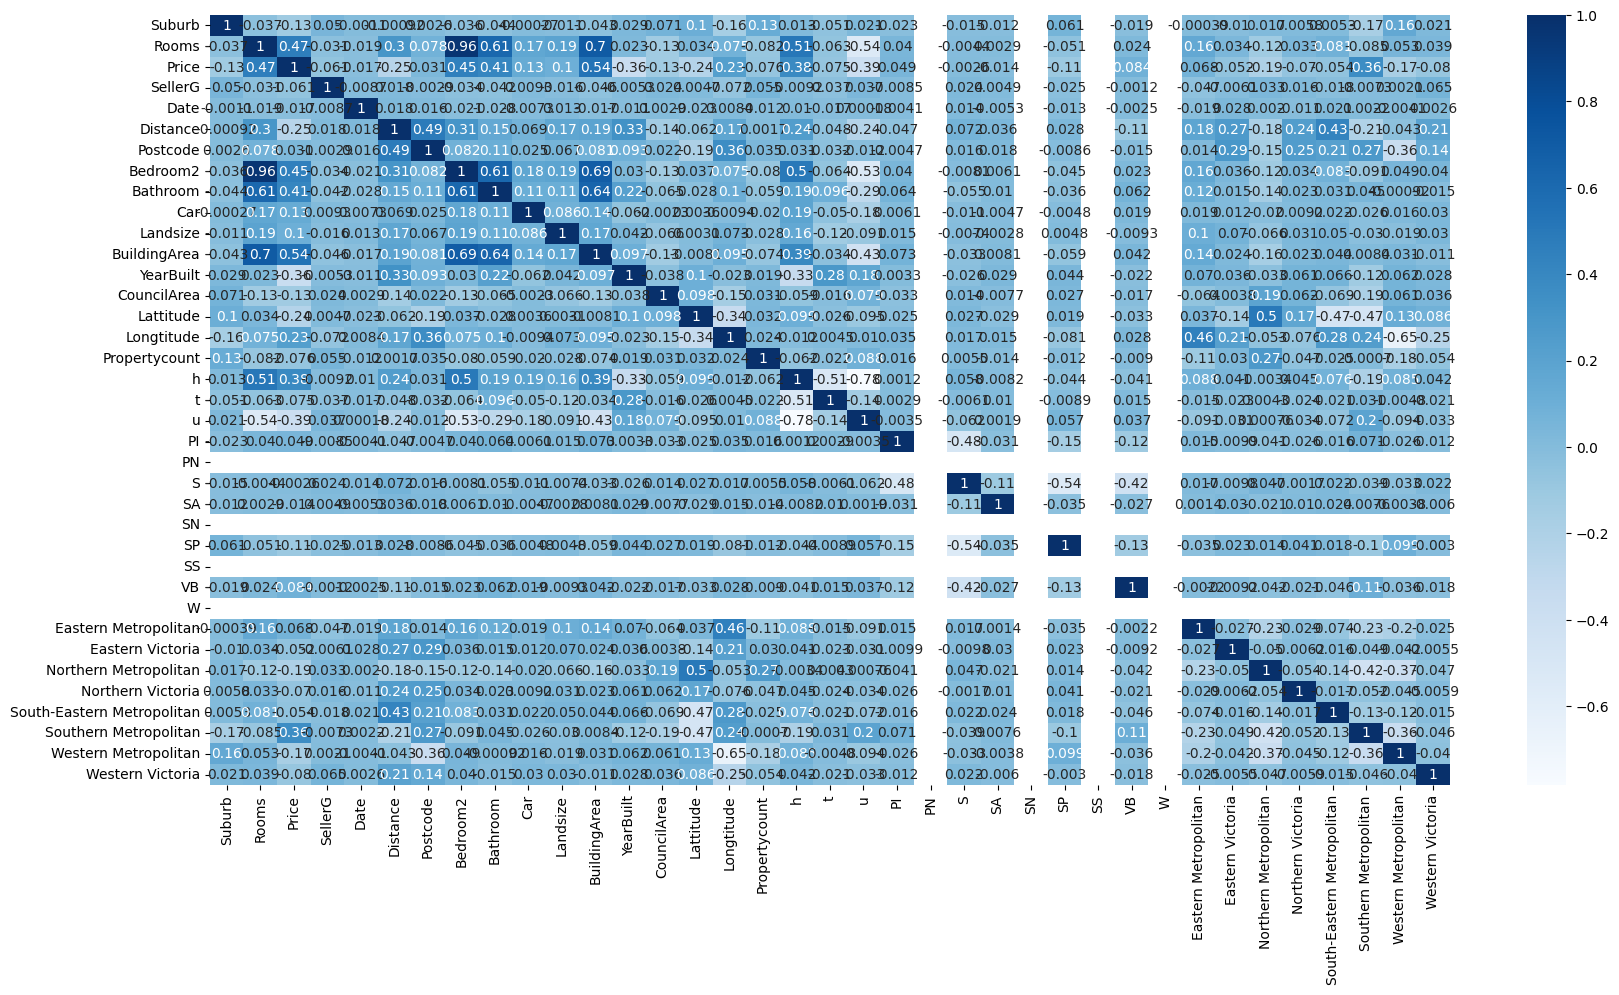

In [256]:
#Correlation matrix
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

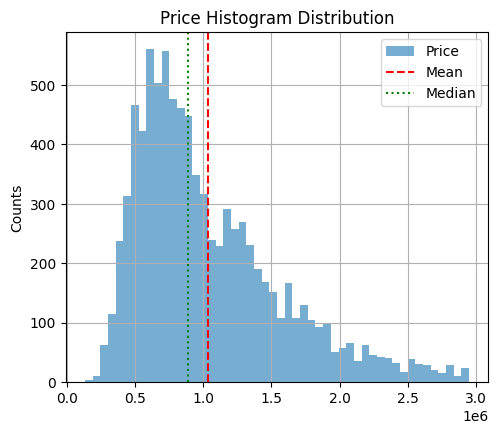

In [257]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df['Price'].hist(bins=50, label='Price', alpha=0.6)
plt.axvline(np.mean(df['Price']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['Price']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Price Histogram Distribution");
plt.legend()

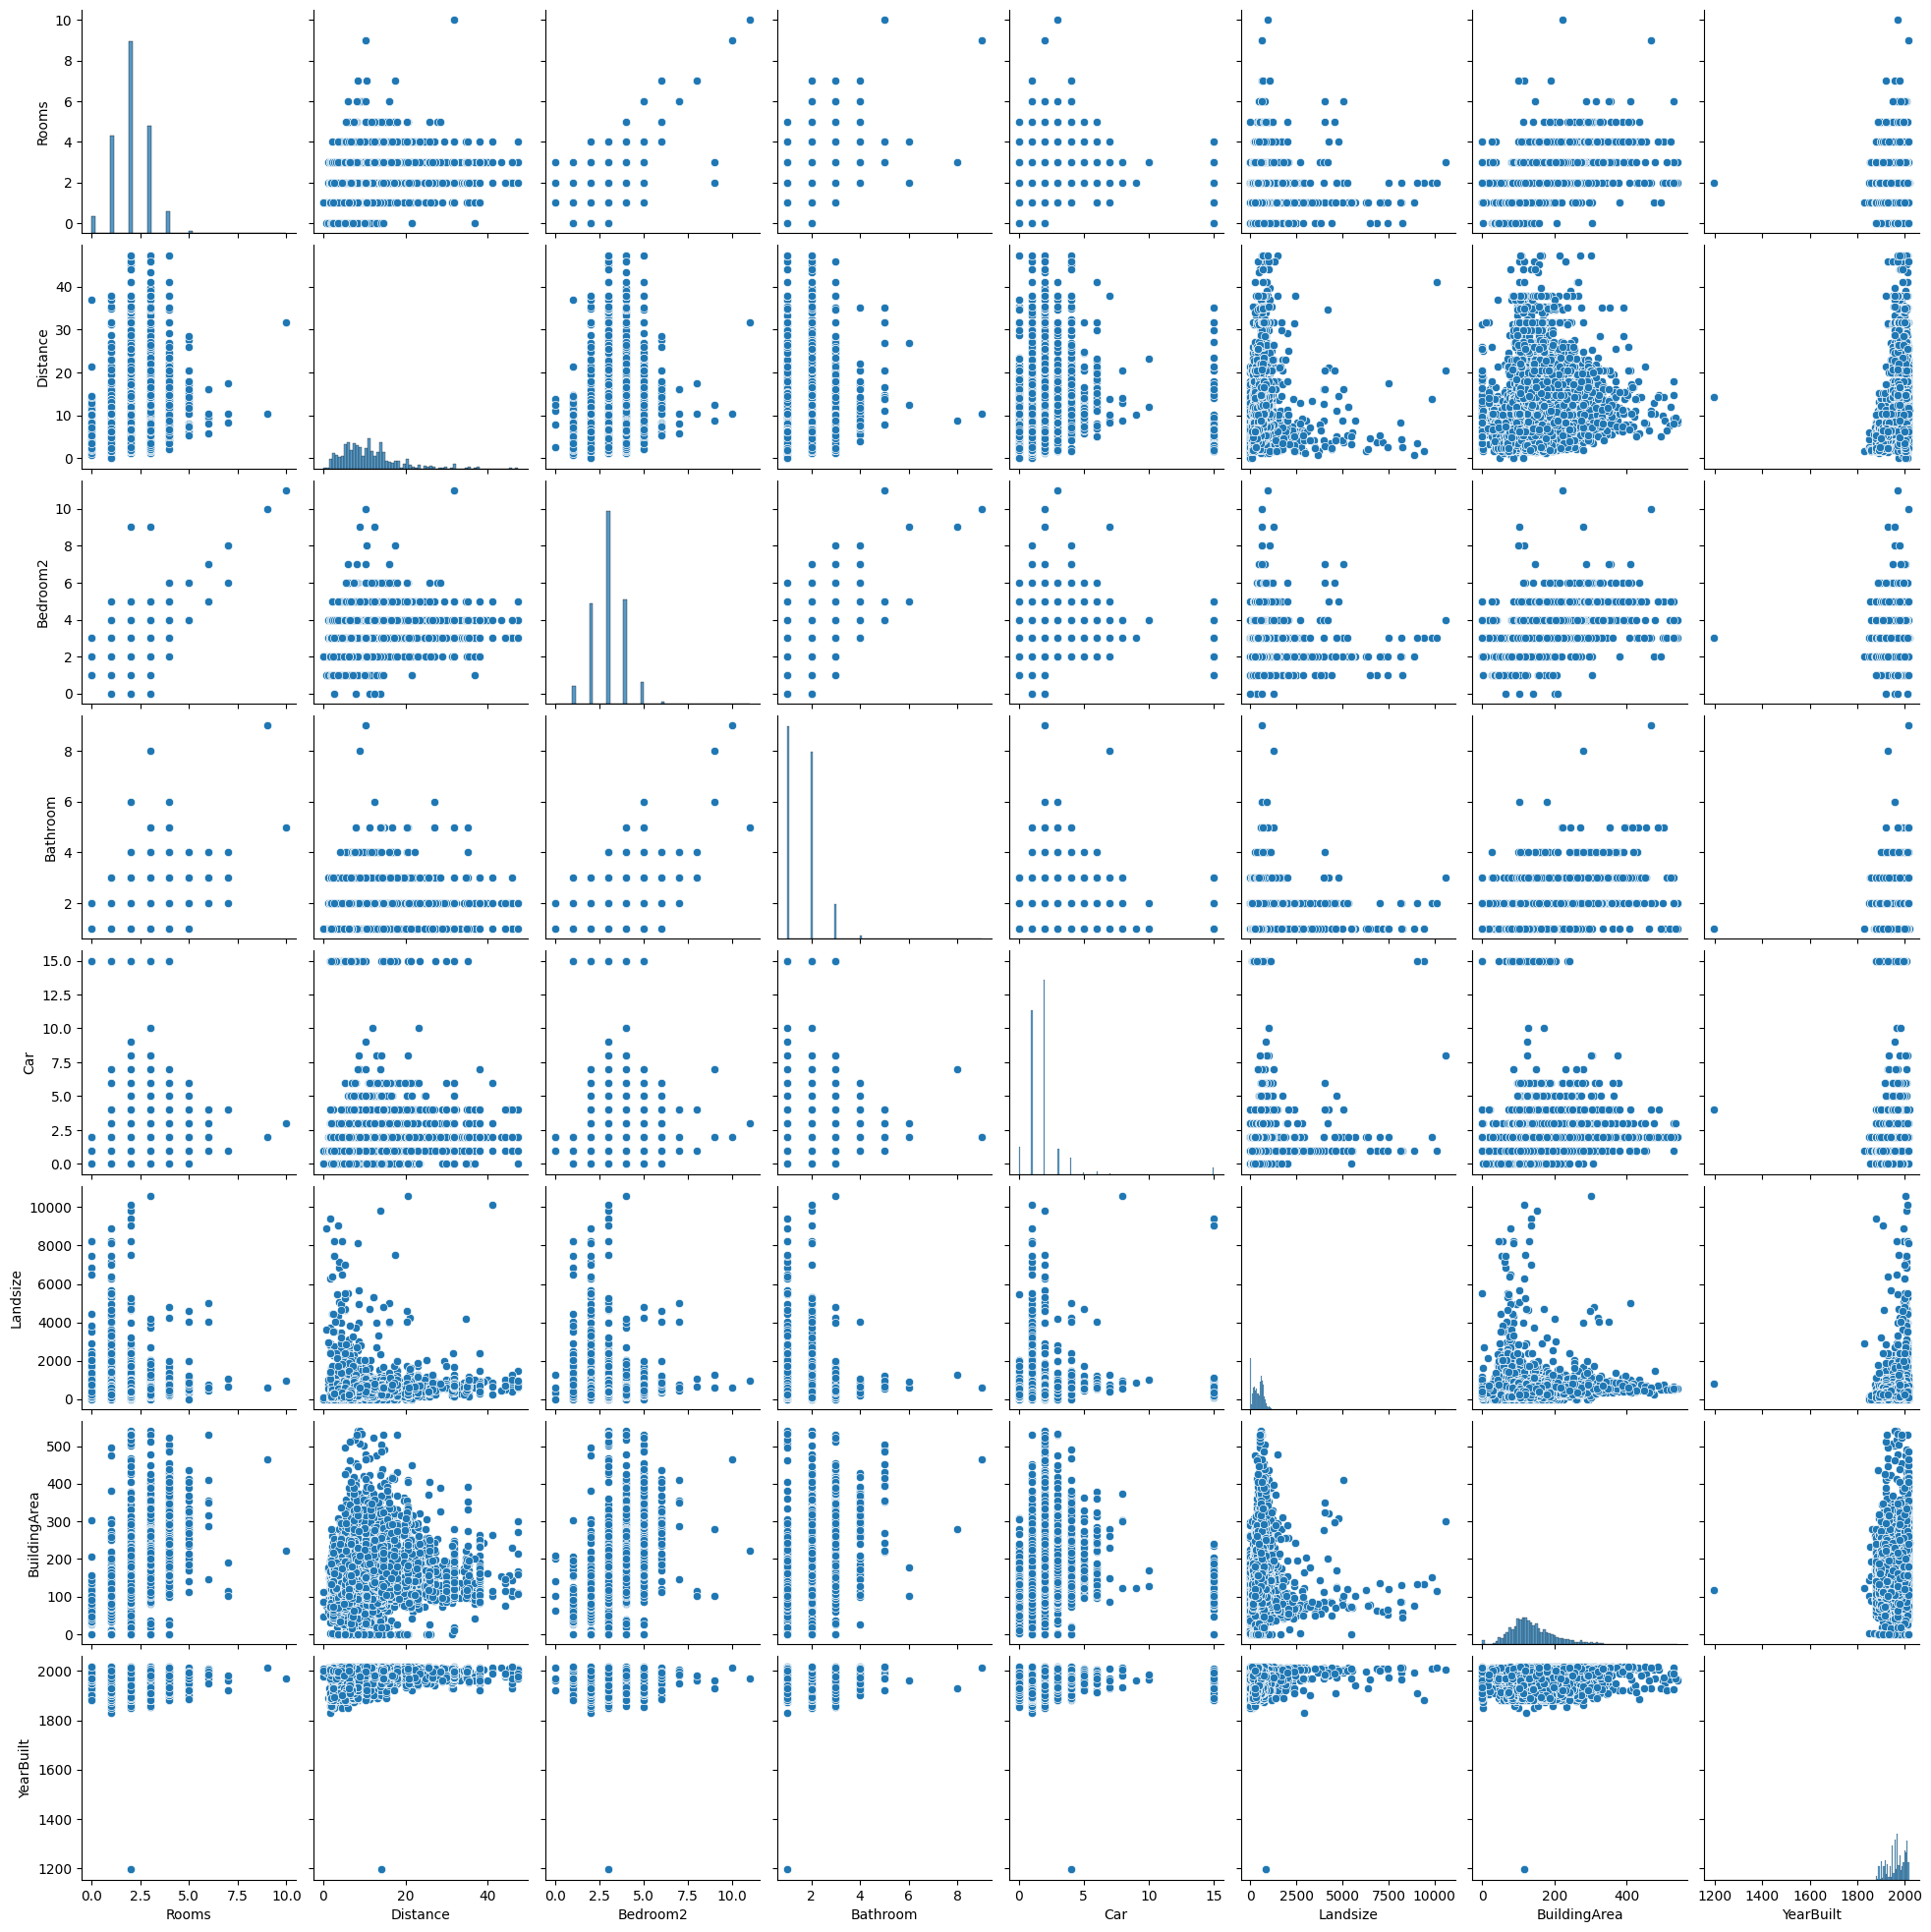

In [259]:
numerical_columns = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
sns.pairplot(df[numerical_columns])
plt.show()

<a id="section-four"></a>
# **Model Selection**

In [260]:
y = df["Price"]
X = df.drop("Price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [261]:
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (7026, 36)
Shape of x_test is (1757, 36)
Shape of y_train is (7026,)
Shape of y_test is (1757,)


In [262]:
#Linear Regression Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


The train score for lr model is 0.7141836262147059
The test score for lr model is 0.7047944093178071


In [263]:
#Lasso Regression Model
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))

The train score for ls model is 0.7141827949883603
The test score for ls model is 0.7048517264385663


In [264]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test score for ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

The train score for ridge model is 0.7132929666907846
The test score for ridge model is 0.7045792440612655


In [265]:
#Random Forest Regression
RF = RandomForestRegressor(n_estimators = 5, random_state = 0)

RF.fit(X_train, y_train)

train_score_RF = RF.score(X_train, y_train)
test_score_RF = RF.score(X_test, y_test)

print("The train score for RF model is {}".format(train_score_RF))
print("The test score for RF model is {}".format(test_score_RF))

The train score for RF model is 0.959918041405102
The test score for RF model is 0.8050188696827296


In [266]:
#K Neighbors Regression
KN = KNeighborsRegressor(n_neighbors=3)

KN.fit(X_train, y_train)

train_score_KN = KN.score(X_train, y_train)
test_score_KN = KN.score(X_test, y_test)

print("The train score for KN model is {}".format(train_score_KN))
print("The test score for KN model is {}".format(test_score_KN))

The train score for KN model is 0.840179504260494
The test score for KN model is 0.6381100784852589
